<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/PAP-lateral_canthoplasty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Patient 1**

#**PAP**

In [ ]:
#両眼同時バージョン

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import MonthLocator, DateFormatter

data = '''2021/8/6,14,20,13,19
2021/10/22,13,9,13,9
2021/11/5,,,15,14
11月25日,14,13,14,13
2021/12/23,16,16,17,16
2022/3/17,,,18,13
2022/4/8,,,20,11
2022/5/27,,,16,18
2022/7/1,,,19,17
2022/8/26,,22,16,18
2022/10/7,,,11,9
2022/12/16,14,13,14,13
2023/3/9,18,17,15,15
2023/3/30,14,13,13,11
2023/4/21,17,17,14,14
2023/6/2,14,14,15,15
2023/7/21,15,8,13,8
2023/8/4,13,8,13,10
2023/11/10,16,10,16,12
2023/12/22,18,11,16,11
2023/12/28,19,10,15,11
2024/3/7,10,11,10,11
2024/3/8,,,12,12'''

dates = []
gat_r = []
gat_l = []
nct_r = []
nct_l = []
surgeries = {
    datetime.datetime(2021, 9, 29): 'L)TLE+MMC',
    datetime.datetime(2022, 9, 5): 'B)levator advencement+lateral canthoplasty',
    datetime.datetime(2023, 6, 28): 'L)TLE+MMC',
    datetime.datetime(2024, 2, 21): 'R) Bleb revision'
}
reference_date = datetime.datetime(2022, 9, 5)

for line in data.split('\n'):
    measurement = line.split(',')
    if '月' in measurement[0]:
        date = datetime.datetime.strptime(measurement[0], '%m月%d日')
        date = date.replace(year=2021)
    else:
        date = datetime.datetime.strptime(measurement[0], '%Y/%m/%d')
    dates.append(date)
    gat_r.append(int(measurement[1]) if measurement[1] else None)
    gat_l.append(int(measurement[2]) if measurement[2] else None)
    nct_r.append(int(measurement[3]) if measurement[3] else None)
    nct_l.append(int(measurement[4]) if measurement[4] else None)

months_from_reference = [(date - reference_date).days / 30.44 for date in dates]

sns.set(style="darkgrid", font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.plot(months_from_reference, gat_r, label='GAT_R', marker='o', color='blue', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, gat_l, label='GAT_L', marker='o', color='red', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, nct_r, label='NCT_R', marker='o', fillstyle='none', color='blue', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax1.plot(months_from_reference, nct_l, label='NCT_L', marker='o', fillstyle='none', color='red', linewidth=2, markersize=10, alpha=0.7, linestyle='--')

for surgery_date, surgery_name in surgeries.items():
    surgery_month = (surgery_date - reference_date).days / 30.44
    ax1.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
    ax1.annotate(surgery_name, xy=(surgery_month, ax1.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

ax1.legend(fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('Months from B)levator advencement+lateral canthoplasty', fontsize=16)
ax1.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax1.set_title('Intraocular Pressure over Time', fontsize=18)

plt.tight_layout()
plt.savefig('patient1_intraocular_pressure_both_eyes.png', dpi=350)
plt.show()

In [ ]:
#両眼別々バージョン

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import MonthLocator, DateFormatter

data = '''2021/8/6,14,20,13,19
2021/10/22,13,9,13,9
2021/11/5,,,15,14
11月25日,14,13,14,13
2021/12/23,16,16,17,16
2022/3/17,,,18,13
2022/4/8,,,20,11
2022/5/27,,,16,18
2022/7/1,,,19,17
2022/8/26,,22,16,18
2022/10/7,,,11,9
2022/12/16,14,13,14,13
2023/3/9,18,17,15,15
2023/3/30,14,13,13,11
2023/4/21,17,17,14,14
2023/6/2,14,14,15,15
2023/7/21,15,8,13,8
2023/8/4,13,8,13,10
2023/11/10,16,10,16,12
2023/12/22,18,11,16,11
2023/12/28,19,10,15,11
2024/3/7,10,11,10,11
2024/3/8,,,12,12'''

dates = []
gat_r = []
gat_l = []
nct_r = []
nct_l = []
surgeries = {
    datetime.datetime(2021, 9, 29): 'L)TLE+MMC',
    datetime.datetime(2022, 9, 5): 'B)levator advencement+lateral canthoplasty',
    datetime.datetime(2023, 6, 28): 'L)TLE+MMC',
    datetime.datetime(2024, 2, 21): 'R) Bleb revision'
}
reference_date = datetime.datetime(2022, 9, 5)

for line in data.split('\n'):
    measurement = line.split(',')
    if '月' in measurement[0]:
        date = datetime.datetime.strptime(measurement[0], '%m月%d日')
        date = date.replace(year=2021)
    else:
        date = datetime.datetime.strptime(measurement[0], '%Y/%m/%d')
    dates.append(date)
    gat_r.append(int(measurement[1]) if measurement[1] else None)
    gat_l.append(int(measurement[2]) if measurement[2] else None)
    nct_r.append(int(measurement[3]) if measurement[3] else None)
    nct_l.append(int(measurement[4]) if measurement[4] else None)

months_from_reference = [(date - reference_date).days / 30.44 for date in dates]

min_pressure = min(min(value for value in gat_r if value is not None),
                   min(value for value in gat_l if value is not None),
                   min(value for value in nct_r if value is not None),
                   min(value for value in nct_l if value is not None))
max_pressure = max(max(value for value in gat_r if value is not None),
                   max(value for value in gat_l if value is not None),
                   max(value for value in nct_r if value is not None),
                   max(value for value in nct_l if value is not None))

sns.set(style="darkgrid", font_scale=1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

ax1.plot(months_from_reference, gat_r, label='GAT_R', marker='o', color='blue', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, nct_r, label='NCT_R', marker='o', fillstyle='none', color='blue', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax1.set_title('Right Eye Intraocular Pressure over Time', fontsize=18)
ax1.set_xlabel('Months from B)levator advencement+lateral canthoplasty', fontsize=16)
ax1.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax1.set_ylim(min_pressure - 1, max_pressure + 1)
ax1.legend(fontsize=16, loc='upper right')
ax1.tick_params(axis='both', labelsize=14)

for surgery_date, surgery_name in surgeries.items():
    if surgery_name.startswith('R') or surgery_name.startswith('B'):
        surgery_month = (surgery_date - reference_date).days / 30.44
        ax1.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
        ax1.annotate(surgery_name, xy=(surgery_month, ax1.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

ax2.plot(months_from_reference, gat_l, label='GAT_L', marker='o', color='red', linewidth=2, markersize=10, alpha=0.7)
ax2.plot(months_from_reference, nct_l, label='NCT_L', marker='o', fillstyle='none', color='red', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax2.set_title('Left Eye Intraocular Pressure over Time', fontsize=18)
ax2.set_xlabel('Months from B)levator advencement+lateral canthoplasty', fontsize=16)
ax2.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax2.set_ylim(min_pressure - 1, max_pressure + 1)
ax2.legend(fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

for surgery_date, surgery_name in surgeries.items():
    if surgery_name.startswith('L') or surgery_name.startswith('B'):
        surgery_month = (surgery_date - reference_date).days / 30.44
        ax2.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
        ax2.annotate(surgery_name, xy=(surgery_month, ax2.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

plt.tight_layout()
plt.savefig('patient1_intraocular_pressure_separate_eyes.png', dpi=350)
plt.show()

#**Patient 2**

In [ ]:
#両眼同時バージョン
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import MonthLocator, DateFormatter

data = '''2022/10/6,20,24,14,13
2022/10/27,,,14,15
2023/2/3,19,16,12,13
2023/4/21,16,16,15,15
2023/6/16,13,13,14,13
2023/9/29,14,14,13,13'''

dates = []
gat_r = []
gat_l = []
nct_r = []
nct_l = []
surgeries = {datetime.datetime(2023, 3, 23): 'B) levator advancement + lateral cathoplasty'}
reference_date = datetime.datetime(2023, 3, 23)

for line in data.split('\n'):
    measurement = line.split(',')
    date = datetime.datetime.strptime(measurement[0], '%Y/%m/%d')
    dates.append(date)
    gat_r.append(int(measurement[1]) if measurement[1] else None)
    gat_l.append(int(measurement[2]) if measurement[2] else None)
    nct_r.append(int(measurement[3]) if measurement[3] else None)
    nct_l.append(int(measurement[4]) if measurement[4] else None)

months_from_reference = [(date - reference_date).days / 30.44 for date in dates]

sns.set(style="darkgrid", font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(14, 10))
ax1.plot(months_from_reference, gat_r, label='GAT_R', marker='o', color='blue', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, gat_l, label='GAT_L', marker='o', color='red', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, nct_r, label='NCT_R', marker='o', fillstyle='none', color='blue', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax1.plot(months_from_reference, nct_l, label='NCT_L', marker='o', fillstyle='none', color='red', linewidth=2, markersize=10, alpha=0.7, linestyle='--')

for surgery_date, surgery_name in surgeries.items():
    surgery_month = (surgery_date - reference_date).days / 30.44
    ax1.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
    ax1.annotate(surgery_name, xy=(surgery_month, ax1.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

ax1.legend(fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlabel('Months from B) levator advancement + lateral cathoplasty', fontsize=16)
ax1.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax1.set_title('Intraocular Pressure over Time', fontsize=18)

plt.tight_layout()
plt.savefig('patient2_intraocular_pressure_both_eyes.png', dpi=350)
plt.show()

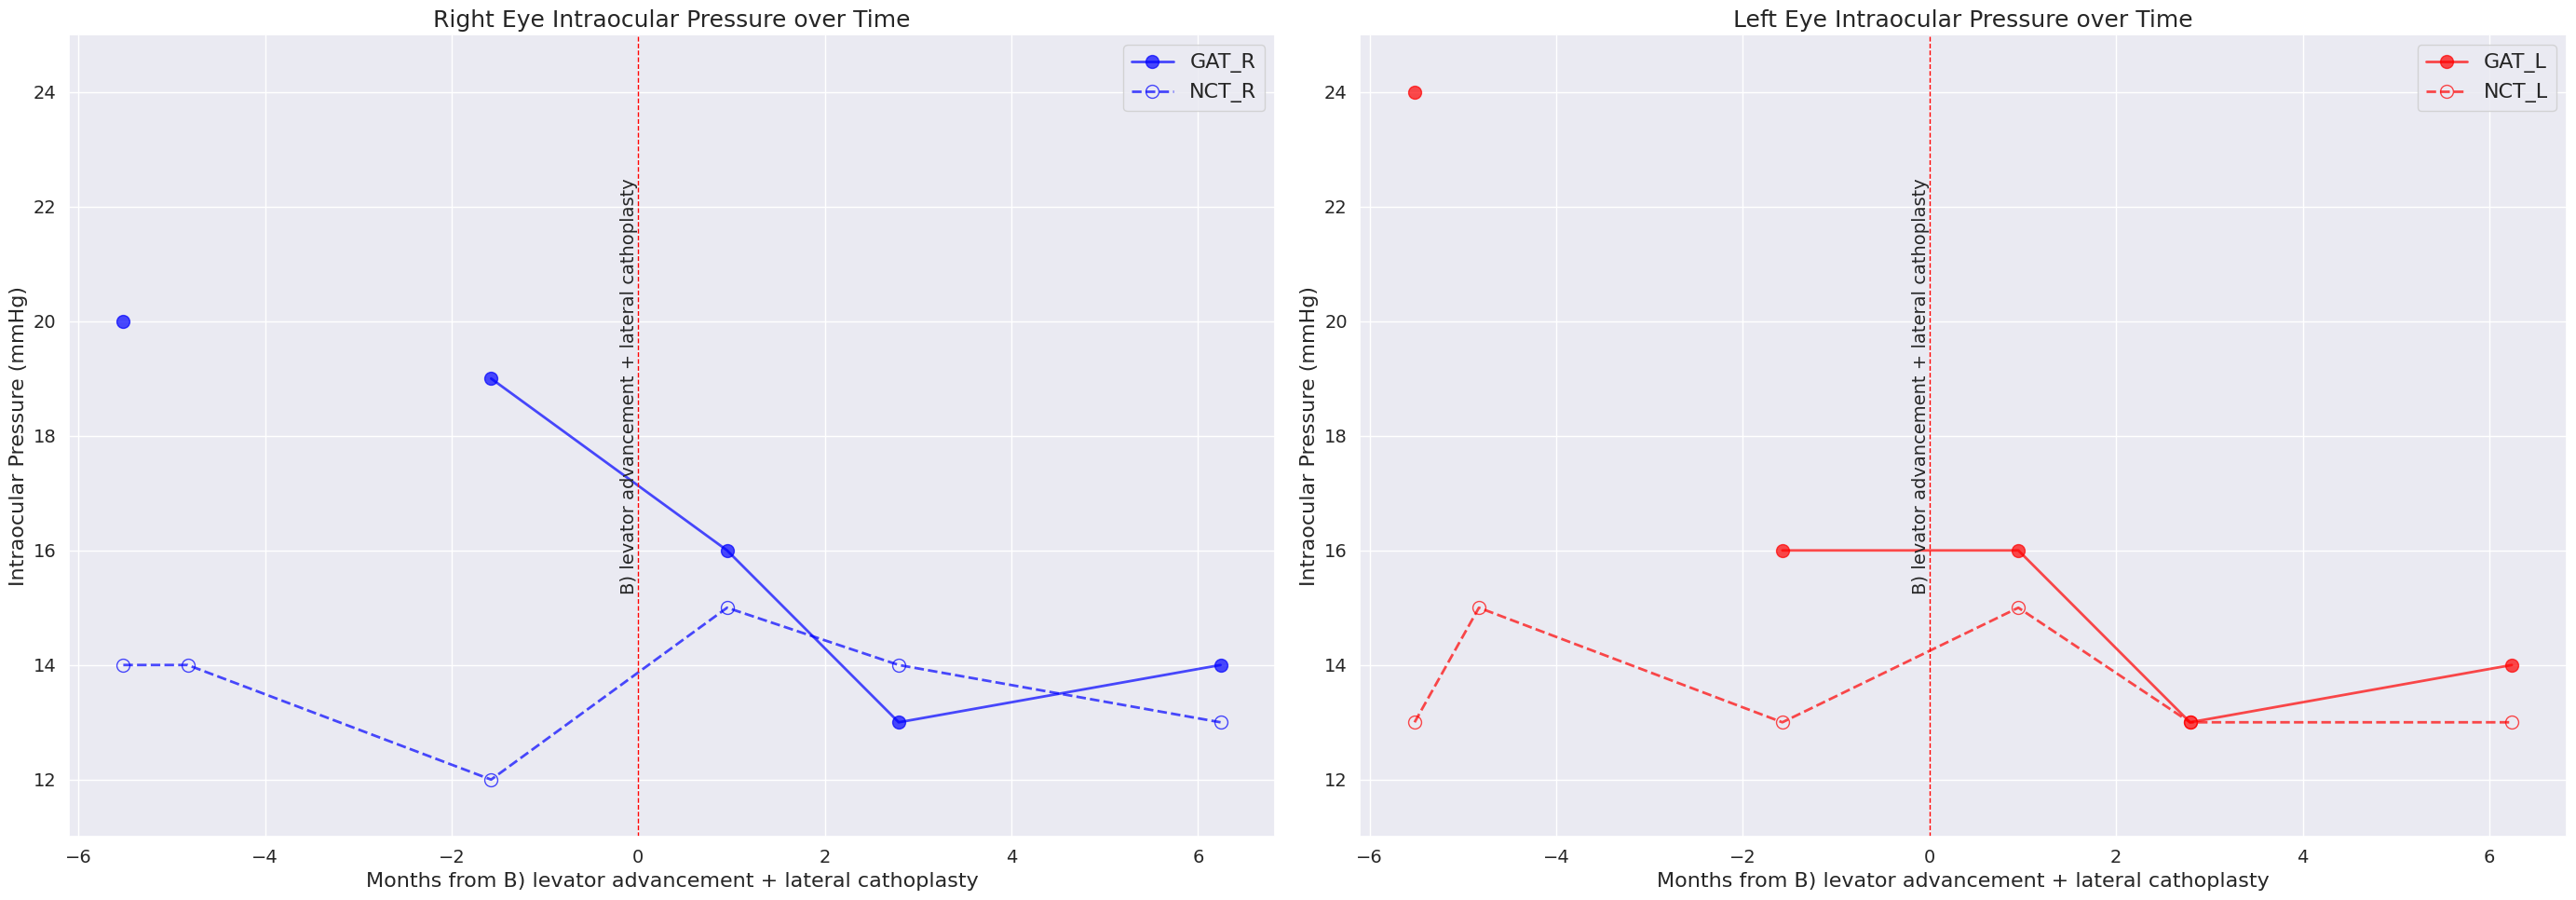

In [23]:
#両眼別々バージョン
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import MonthLocator, DateFormatter

data = '''2022/10/6,20,24,14,13
2022/10/27,,,14,15
2023/2/3,19,16,12,13
2023/4/21,16,16,15,15
2023/6/16,13,13,14,13
2023/9/29,14,14,13,13'''

dates = []
gat_r = []
gat_l = []
nct_r = []
nct_l = []
surgeries = {datetime.datetime(2023, 3, 23): 'B) levator advancement + lateral cathoplasty'}
reference_date = datetime.datetime(2023, 3, 23)

for line in data.split('\n'):
    measurement = line.split(',')
    date = datetime.datetime.strptime(measurement[0], '%Y/%m/%d')
    dates.append(date)
    gat_r.append(int(measurement[1]) if measurement[1] else None)
    gat_l.append(int(measurement[2]) if measurement[2] else None)
    nct_r.append(int(measurement[3]) if measurement[3] else None)
    nct_l.append(int(measurement[4]) if measurement[4] else None)

months_from_reference = [(date - reference_date).days / 30.44 for date in dates]

min_pressure = min(min(value for value in gat_r if value is not None),
                   min(value for value in gat_l if value is not None),
                   min(value for value in nct_r if value is not None),
                   min(value for value in nct_l if value is not None))
max_pressure = max(max(value for value in gat_r if value is not None),
                   max(value for value in gat_l if value is not None),
                   max(value for value in nct_r if value is not None),
                   max(value for value in nct_l if value is not None))

sns.set(style="darkgrid", font_scale=1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))

ax1.plot(months_from_reference, gat_r, label='GAT_R', marker='o', color='blue', linewidth=2, markersize=10, alpha=0.7)
ax1.plot(months_from_reference, nct_r, label='NCT_R', marker='o', fillstyle='none', color='blue', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax1.set_title('Right Eye Intraocular Pressure over Time', fontsize=18)
ax1.set_xlabel('Months from B) levator advancement + lateral cathoplasty', fontsize=16)
ax1.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax1.set_ylim(min_pressure - 1, max_pressure + 1)
ax1.legend(fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

for surgery_date, surgery_name in surgeries.items():
    surgery_month = (surgery_date - reference_date).days / 30.44
    ax1.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
    ax1.annotate(surgery_name, xy=(surgery_month, ax1.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

ax2.plot(months_from_reference, gat_l, label='GAT_L', marker='o', color='red', linewidth=2, markersize=10, alpha=0.7)
ax2.plot(months_from_reference, nct_l, label='NCT_L', marker='o', fillstyle='none', color='red', linewidth=2, markersize=10, alpha=0.7, linestyle='--')
ax2.set_title('Left Eye Intraocular Pressure over Time', fontsize=18)
ax2.set_xlabel('Months from B) levator advancement + lateral cathoplasty', fontsize=16)
ax2.set_ylabel('Intraocular Pressure (mmHg)', fontsize=16)
ax2.set_ylim(min_pressure - 1, max_pressure + 1)
ax2.legend(fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

for surgery_date, surgery_name in surgeries.items():
    surgery_month = (surgery_date - reference_date).days / 30.44
    ax2.axvline(x=surgery_month, color='red', linestyle='--', linewidth=1)
    ax2.annotate(surgery_name, xy=(surgery_month, ax2.get_ylim()[1]*0.9), fontsize=14, ha='right', va='top', rotation=90)

plt.tight_layout()
plt.savefig('patient2_intraocular_pressure_separate_eyes.png', dpi=350)
plt.show()